In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from itertools import cycle

%matplotlib inline

In [452]:
def colors():
    cmap = get_cmap('plasma')
    coeffs = np.linspace(0, 1, 12)
    np.random.shuffle(coeffs)
    for x in cycle(coeffs):
        color = cmap(x)
        yield color
colors = colors()

### Normal distribution

Generate samples from a standard normal distribution

In [453]:
samples = np.random.randn(5000)

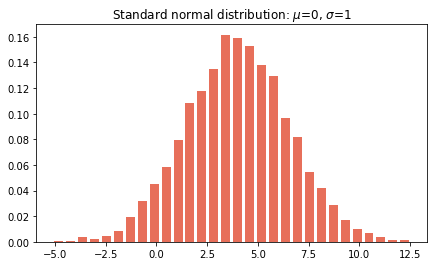

In [478]:
plt.figure(figsize=(7, 4))
plt.hist(samples, bins=30, density=True, rwidth=0.75, color=next(colors));
plt.title('Standard normal distribution: $\mu$=0, $\sigma$=1');

Generate samples from a normal distributon of mean $\mu$ and standard deviation $\sigma$

In [474]:
mu, sigma = 4, 2.5
samples = np.random.randn(5000) * sigma + mu

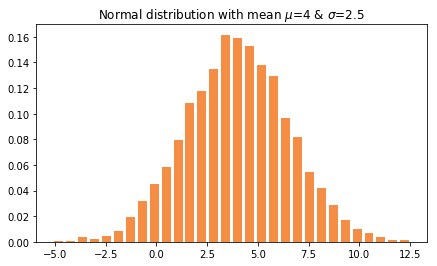

In [477]:
plt.figure(figsize=(7, 4))
plt.hist(samples, bins=30, density=True, rwidth=0.75, color=next(colors));
plt.title('Normal distribution with mean $\mu$={} & $\sigma$={}'.format(mu, sigma));

## Discrete uniform distribution

Generate integers from a discrete uniform distribution in the interval [a, b]

In [472]:
a, b = 2, 15
samples = np.random.randint(a, b+1, size=5000)
n = b - a + 1

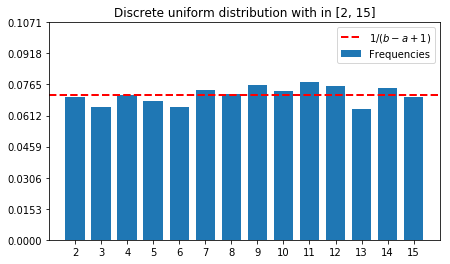

In [473]:
plt.figure(figsize=(7, 4))

plt.hist(samples, bins=np.arange(a, b+2)-0.5, density=True,
         rwidth=0.75, align='mid')
plt.hlines([1 / n], linestyles='--', linewidth=2, colors='red', xmin=a-1, xmax=b+1)

plt.xticks(np.arange(a, b+1));
plt.yticks(np.linspace(0, 1.5 / n, 8));
plt.xlim((a-1, b+1))

plt.title('Discrete uniform distribution with in [{}, {}]'.format(a, b));
plt.legend(['$1 / (b - a + 1)$', 'Frequencies'])

## Continuous uniform distribution

Generate samples from a continuous uniform distribution in the interval [a, b)

In [470]:
a, b = 3, 8
samples = np.random.random(5000) * (b - a) + a

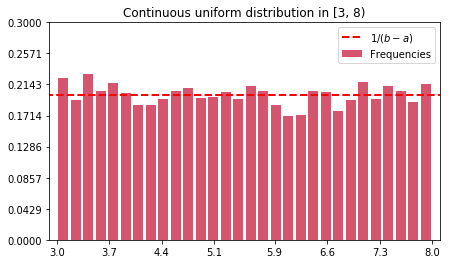

In [471]:
plt.figure(figsize=(7, 4))

plt.hist(samples, bins=30, density=True, rwidth=0.8, color=next(colors));
plt.hlines([1 / (b - a)], linestyles='--', linewidth=2, colors='red', xmin=a-1, xmax=b+1)

plt.xlim((a-0.1, b+0.1))
plt.xticks(np.linspace(a, b, 8).round(1));
plt.yticks(np.linspace(0, 1.5 / (b - a), 8));

plt.title('Continuous uniform distribution in [{}, {})'.format(a, b));
plt.legend(['$1 / (b - a)$', 'Frequencies']);

## Binomial distribution 

Generate samples from a binomial distribution given the parameters n (number of repetitions of the experiment) and p (probability of success of each independent experiment)

In [479]:
n = 40
p, p2 = 1/6, 1/4
samples = np.random.binomial(n, p, size=5000)
samples2 = np.random.binomial(n, p2, size=5000)

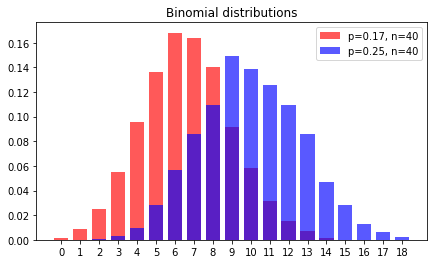

In [480]:
plt.figure(figsize=(7, 4))
plt.hist(samples, bins=np.arange(0, samples.max()+1)-0.5,
         density=True, color='red', rwidth=0.75, alpha=0.65, align='mid');
plt.hist(samples2, bins=np.arange(0, samples2.max()+1)-0.5,
         density=True, color='blue', rwidth=0.75, alpha=0.65, align='mid');

plt.xticks(np.arange(0, max(samples.max(), samples2.max())))

plt.legend([
    'p={}, n={}'.format(np.round(p, 2), n),
    'p={}, n={}'.format(np.round(p2, 2), n)
    ]);
plt.title('Binomial distributions');

## Poisson distribution

Generate samples from a poisson distribution given different values for the paramater $\lambda$ <br/>

In [463]:
lambdas = range(1, 12, 2)
samples = np.concatenate([np.random.poisson(l, size=6000).reshape([-1, 1])
                          for l in lambdas], axis=1).swapaxes(0, 1)

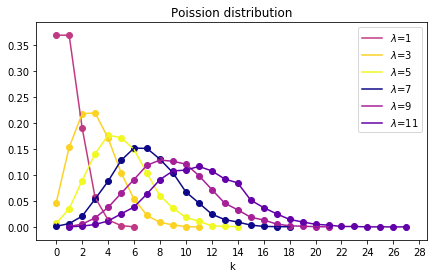

In [468]:
plt.figure(figsize=(7, 4))
for l, values in zip(lambdas, samples):
    x = np.arange(values.min(), values.max()+1)
    bins = np.concatenate([x, [values.max()+2]])
    hist = np.histogram(values, bins=bins, density=True)[0]
    
    color = next(colors)
    plt.plot(x, hist, color=color)
    plt.scatter(x, hist, color=color)

plt.xticks(np.arange(0, 30, 2))
plt.xlabel('k')
plt.legend(['$\lambda$={}'.format(l) for l in lambdas])
plt.title('Poission distribution');